<a href="https://colab.research.google.com/github/nars95/machine_learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

In [54]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 12.1 MB/s eta 0:00:00


In [63]:
print('tensorflow = {} e keras api = {}'.format(tf.__version__, keras.__version__))

tensorflow = 2.12.0 e keras api = 2.12.0


In [151]:
(X_train_full, y_train_full), (X_test, y_test) =  fashion_mnist.load_data()

In [152]:
print(X_train_full.shape, X_train_full.dtype)

(60000, 28, 28) uint8


In [153]:
# input shape (samples, length, width, channel)
X_train_full = X_train_full.reshape(X_train_full.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [154]:
print(X_train_full.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [155]:
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0
print(X_train.shape, X_train.dtype, X_val.shape, X_val.dtype, X_test.shape, X_test.dtype)

(55000, 28, 28, 1) float64 (5000, 28, 28, 1) float64 (10000, 28, 28, 1) float64


In [156]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(y_train[100])
print(class_name[y_train[100]])

2
Pullover


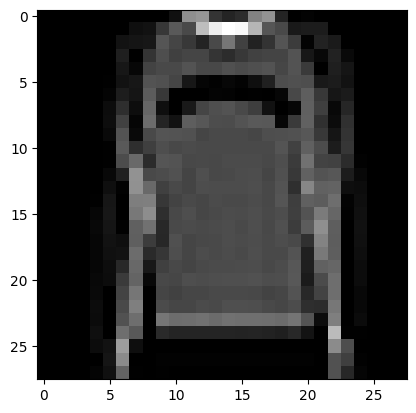

In [157]:
img = X_train[100]
plt.imshow(img, cmap='gray')
plt.show();

#Treinando um modelo para reconhecer as imagens do fashion_mnist usando Api Sequential do keras.

In [161]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28, 1]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [162]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


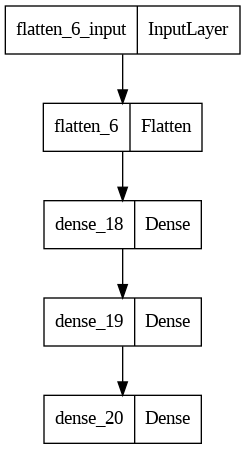

In [163]:
 # gerando uma imagem do modelo
img_model = keras.utils.plot_model(model)
img_model

In [164]:
model.layers # camadas do modelo

In [165]:
hidden1 = model.layers[1]
hidden1.name

'dense_18'

In [166]:
model.get_layer('dense_18') is hidden1

True

#Acessando os pesos de uma camada Densa: que inclui os pesos de conexão e os vieses de cada neurônio da camada.

Para isso usamos o método o get_weights(). Esse método retorna uma lista com dois elementos: 1) Elemento é uma matriz de pesos do modelo, isto é, a conexação da camada anterior e os neurônios desta camada. 2) Um vetor contendo o vies de cada neurônio da camada, que no caso da hidden1 (dense) é um vetor com 300 vieses. Vamos dar uma olhada nisso:

In [167]:
first, second = hidden1.get_weights()
print(first.shape, second.shape)


(784, 300) (300,)


#Compilando o modelo

In [168]:
from keras.engine.training import optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#Treinando e avaliando o modelo

In [169]:
history = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_val, y_val))

Epoch 1/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7416 - accuracy: 0.7600 - val_loss: 0.5103 - val_accuracy: 0.8252
Epoch 2/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4910 - accuracy: 0.8287 - val_loss: 0.4567 - val_accuracy: 0.8446
Epoch 3/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4437 - accuracy: 0.8438 - val_loss: 0.4603 - val_accuracy: 0.8326
Epoch 4/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4185 - accuracy: 0.8519 - val_loss: 0.3970 - val_accuracy: 0.8642
Epoch 5/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3982 - accuracy: 0.8597 - val_loss: 0.3964 - val_accuracy: 0.8606
Epoch 6/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3829 - accuracy: 0.8653 - val_loss: 0.3702 - val_accuracy: 0.8712
Epoch 7/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3696 - accuracy: 0.8689 - val_loss: 0.3664 - val_accuracy:

O método .fit() retorna um objeto History que contém alguns atributos importantes: History.epoch (lista de épocas pelos quais passou), History.params (parâmetros de treinamento) e History.history (métricas de acurácia e perda - tanto do treinamento quanto da validação, caso exista.)

In [170]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.741575,0.760018,0.510349,0.8252
1,0.491007,0.828691,0.456683,0.8446
2,0.443668,0.843800,0.460306,0.8326
3,0.418509,0.851927,0.396975,0.8642
4,0.398158,0.859727,0.396388,0.8606
5,0.382893,0.865273,0.370194,0.8712
6,0.369569,0.868891,0.366450,0.8720
7,0.358238,0.872982,0.379741,0.8612
8,0.347048,0.876945,0.348930,0.8732
9,0.338464,0.878509,0.337839,0.8770


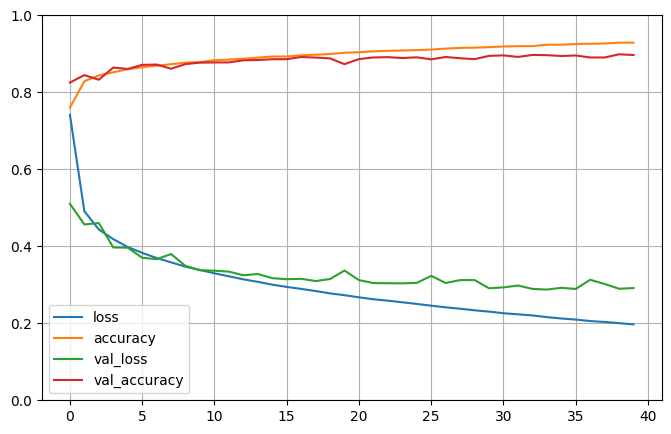

In [171]:
metrics.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [172]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3224 - accuracy: 0.8827


[0.3224097192287445, 0.8827000260353088]

In [180]:
X_new = X_test[:4]
predict_proba = model.predict(X_new)
predict_proba

1/1 [==============================] - 0s 30ms/step


array([[2.7016779e-07, 1.1969287e-08, 6.9037374e-06, 2.9800194e-07,
        1.2947608e-07, 7.4884971e-04, 6.3106387e-07, 1.6084543e-03,
        1.2836390e-05, 9.9762160e-01],
       [1.3308835e-04, 8.2022602e-09, 9.9743253e-01, 9.4935064e-09,
        2.3851374e-03, 5.0892746e-10, 4.9291237e-05, 1.8917866e-12,
        5.9592926e-09, 1.2017234e-10],
       [1.9821189e-06, 9.9999774e-01, 9.0503329e-09, 1.2127263e-07,
        9.4308433e-08, 4.8225367e-13, 1.0625661e-09, 9.5087674e-11,
        6.9195969e-09, 2.8175680e-13],
       [1.7094511e-05, 9.9993336e-01, 2.6817193e-07, 4.7583711e-05,
        1.6039897e-06, 4.0648193e-10, 1.6774172e-07, 8.0198976e-09,
        8.9322478e-09, 7.7746903e-10]], dtype=float32)

In [181]:
predict_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [182]:
y_test[:4]

array([9, 2, 1, 1], dtype=uint8)

In [178]:
# explain predictions of the model on three images
e = shap.DeepExplainer(model, X_test[:1000])
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[0:4])

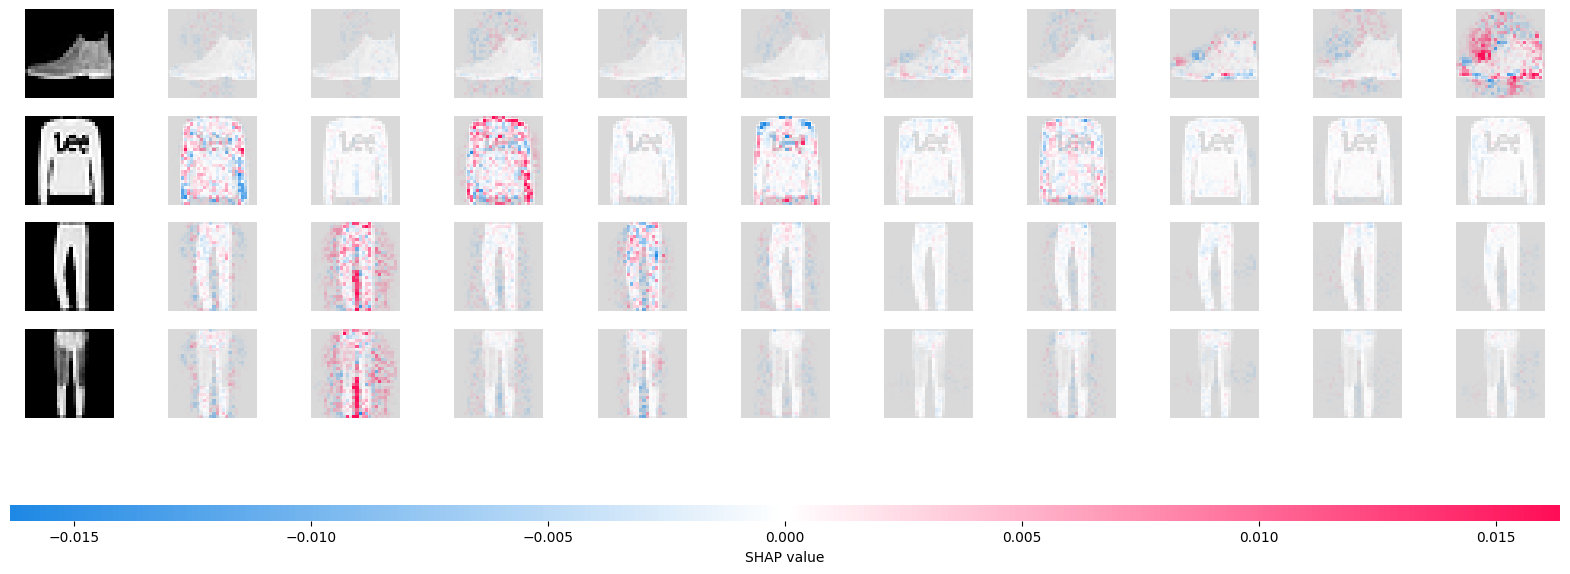

In [184]:
shap.image_plot(shap_values, X_test[0:4])